# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

### Pregunta 1

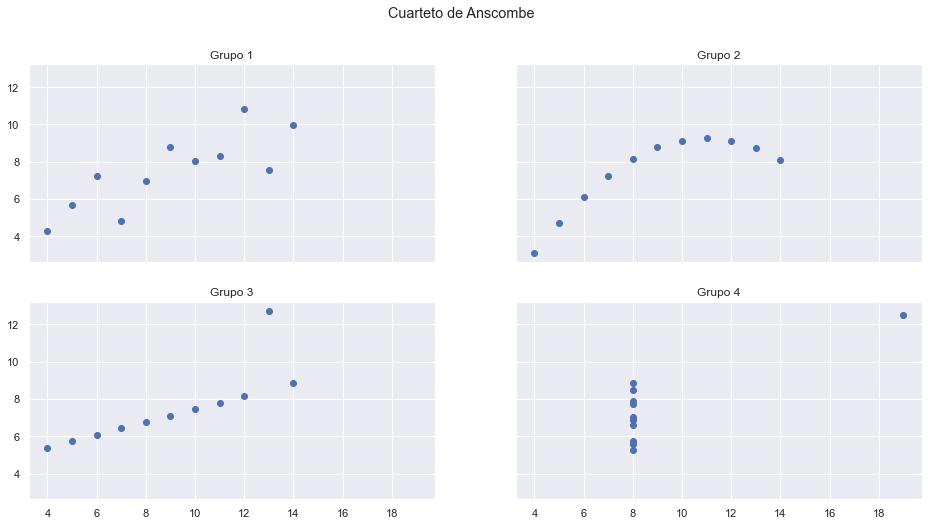

In [5]:
groups = range(1, 4 + 1) # Definimos los grupos a recorrer
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), sharex=True, sharey=True) # Se inicializa la figura
fig.suptitle("Cuarteto de Anscombe") # Título de la figura
for i, ax in zip(groups, axs.ravel()): # Recorremos los 4 grupos
    dfa = df[(df['grupo'] == f'Grupo_{i}')]
    x = dfa.loc[:, "x"].values # obtenemos los valores en x de cada grupo
    y = dfa.loc[:, "y"].values # obtenemos los valores en y de cada grupo
    ax.plot(x, y, 'o') # graficamos los puntos.
    ax.set_title(f"Grupo {i}") # Títulos de las subfiguras

- Se forma gráfica se aprecia una gran diferencia entre los grupos de datos. No solo se aprecian comportamientos lineales, cuadrático o de dispersión, sino también vemos datos que podría ser considerados outliers

### Pregunta 2

In [6]:
for i in range(1, 4 + 1): # Recorrimos los grupos
    dfa = df[(df['grupo'] == f'Grupo_{i}')]
    print(dfa.describe()) # utilizamos en comando describe() para obtener información.

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

- Se aprecia que tanto la media como la desviación estándar para los datos son iguales en los cuatro grupos. Esto refuerza la necesidad de gráficar.
- Los rangos intercuantiles si se aprecian diferentes.

### Pregunta 3

In [7]:
# Previamente realizamos un análisis sencillo de los datos, específicamente de su pendiente y el punto de intersección con el 
# eje Y
for i in range(1, 4 + 1): # Recorremos los grupos
    dfa = df[(df['grupo'] == f'Grupo_{i}')]
    x = dfa.loc[:, "x"].values  # obtenemos los valores en x de cada grupo
    y = dfa.loc[:, "y"].values  # obtenemos los valores en y de cada grupo
    slope, intercept = np.polyfit(x, y, 1) # Ajustamos una recta a los datos.
    print(f"Grupo {i}:\n\tTiene pendiente {slope:.2f} e intercepto {intercept:.2f}.\n") # imprimimos los datos que buscamos.

Grupo 1:
	Tiene pendiente 0.50 e intercepto 3.00.

Grupo 2:
	Tiene pendiente 0.50 e intercepto 3.00.

Grupo 3:
	Tiene pendiente 0.50 e intercepto 3.00.

Grupo 4:
	Tiene pendiente 0.50 e intercepto 3.00.



- Se aprecia que todos los grupos de datos tienen la misma pendiente y mismo intercepto considerando una ajuste lineal de estos. Esto podría hacernos pensar que tienen una dispersión de puntos similar. Para verificar esto se procede a gráficar los datos.

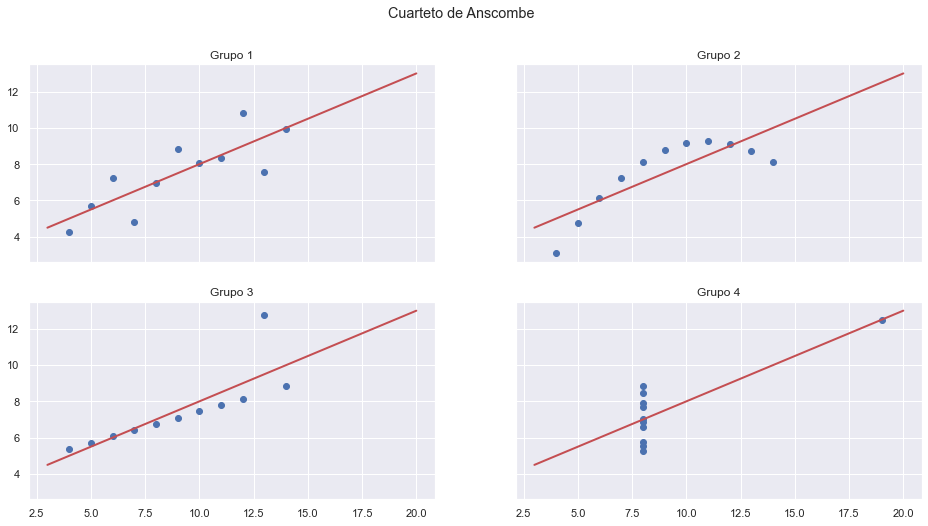

In [8]:
groups = range(1, 4 + 1) # Definimos los grupos a recorrer.
x_columns = [col for col in df if "x" in col]
x_aux = np.arange(
    df.loc[:, x_columns].values.min() - 1,
    df.loc[:, x_columns].values.max() + 2
)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), sharex=True, sharey=True) # Inicializamos la figura
fig.suptitle("Cuarteto de Anscombe") # Título de la figura
for i, ax in zip(groups, axs.ravel()): # Recorremos los grupos
    dfa = df[(df['grupo'] == f'Grupo_{i}')] # obtenemos la información de cada grupo
    x = dfa.loc[:, "x"].values # obtenemos los valores en x de cada grupo
    y = dfa.loc[:, "y"].values # obtenemos los valores en y de cada grupo
    m, b = np.polyfit(x, y, 1) # Ajustamos un polinomio de grado 1 (recta)
    ax.plot(x, y, 'o') # Graficamos los datos
    ax.plot(x_aux, m * x_aux + b, 'r', lw=2.0) # Graficamos la recta ajustada.
    ax.set_title(f"Grupo {i}") # Título de cada subgráfico

- Al igual que ya habiamos analizado previamente, se tiene que el ajuste lineal no logra capturar de buena forma los comportamientos de los 4 grupos de datos.

### Preguntas 4 y 5

In [10]:
# Importamos las librerias que vamos a utilizar
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.metrics import explained_variance_score, r2_score, max_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, median_absolute_error

In [11]:
# Se trabajará con una clase
class SklearnRegressionModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    # Obtenemos los conjuntos de entrenamiento y testeo
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    # Ajustamos en modelo a los conjuntos de entrenamiento
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    # Testeamos el modelo con el conjunto de testeo.
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    # Definimos las métricas a evaluar
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        exp_var = explained_variance_score(df_temp['y'],df_temp['yhat'])
        r2 = round(r2_score(df_temp['y'],df_temp['yhat']),4)
        MAE = mean_absolute_error(df_temp['y'],df_temp['yhat'])
        MSE = mean_squared_error(df_temp['y'],df_temp['yhat'])
        MSLE = mean_squared_log_error(df_temp['y'],df_temp['yhat'])
        MedAE = median_absolute_error(df_temp['y'],df_temp['yhat'])
        
        df_metrics = pd.DataFrame()
        
        df_metrics = df_metrics.append({
            'exp_var':exp_var,
            'r2': r2,
            'MAE':MAE,
            'MSE':MSE,
            'MSLE':MSLE,
            'MedAE':MedAE,
            'model':self.name_model
        }, ignore_index=True)
        
        return df_metrics

    def parameters(self,X,y,test_size):
        model_fit = self.fit_model(X,y,test_size)
        
        list_betas = [
             ('beta_0',model_fit.intercept_)
                ]
            
        betas = model_fit.coef_
        
        for num, beta in enumerate(betas):
            name_beta = f'beta_{num+1}'
            list_betas.append((name_beta,round(beta,2)))

        result = pd.DataFrame(
            columns = ['coef','value'],
            data = list_betas
        )
        
        result['model'] = self.name_model
        return result 

In [40]:
# Se definen los modelos a utilizar
reg_lineal = linear_model.LinearRegression()
reg_ridge = linear_model.Ridge(alpha=.5)
reg_lasso = linear_model.Lasso(alpha=0.1)

reg_knn = neighbors.KNeighborsRegressor(5,weights='uniform')
reg_bayesian = linear_model.BayesianRidge()
reg_tree = tree.DecisionTreeRegressor(max_depth=5)
reg_svm = svm.SVR(kernel='linear')

# Se crea las lista de los modelos previamente definidos.
list_models =[
    [reg_lineal,'lineal'],
    [reg_ridge,'ridge'],
    [reg_lasso,'lasso'],
    [reg_knn,'knn'],
    [reg_bayesian,'bayesian'],
    [reg_tree,'decision_tree'],
    [reg_svm,'svm'],
]

### Pregunta 4

In [41]:
# Seleccionamos el modelo lineal para esta pregunta
model1 = reg_lineal
name_models1 = 'lineal'

for i in range(1, 4+1): # Recorremos los cuatro grupos
    dfa = df[(df['grupo'] == f'Grupo_{i}')] # Obtenemos los datos de cada grupo
    X = dfa[['x']] # obtenemos los valores en x de cada grupo
    Y = dfa['y'] # obtenemos los valores en y de cada grupo

    frames_metrics = [] # Creamos listas vacías para guardar datos.
    frames_coef = []

    fit_model =  SklearnRegressionModels( model1,name_models1) # aplicamos el modelo elegido a la clase definida previamente
    frames_metrics.append(fit_model.metrics(X,Y,0.2)) # Agregamos los datos de la métrica a la lista vacía.
    if name_models in ['lineal','ridge','lasso']: # En el caso de tratarse de uno de los 2 ajustes se guardan los parámetros.
        frames_coef.append(fit_model.parameters(X,Y,0.2))

    # juntar resultados: metricas
    aux = pd.concat(frames_metrics)
    print('Metricas para el Grupos',i) # Mostramos los resultados por pantalla.
    print(aux)
    print('')

Metricas para el Grupos 1
        MAE       MSE      MSLE     MedAE  exp_var   model      r2
0  0.716132  1.257577  0.027581  0.126154   0.8344  lineal  0.7204

Metricas para el Grupos 2
       MAE       MSE      MSLE     MedAE   exp_var   model      r2
0  1.49859  2.850419  0.029208  0.948846 -3.728407  lineal -3.8207

Metricas para el Grupos 3
        MAE       MSE      MSLE     MedAE   exp_var   model      r2
0  0.981303  1.454809  0.013736  0.897885  0.499381  lineal -0.4807

Metricas para el Grupos 4
        MAE       MSE      MSLE     MedAE  exp_var   model      r2
0  0.481429  0.367133  0.005299  0.345714      0.0  lineal -0.2071



- A través de una regresión lineal se aprecia que el grupo que mejor se ajusta a una regresión lineal es el grupo 1.
- Se deben ajustar otros modelos de regresión para comprobar el comportamiento de los 

In [42]:
# Otra forma de resolver la pregunta 4

# se cargan los paquetes de sklearn necesarios.
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import explained_variance_score, r2_score, max_error, mean_absolute_error, mean_squared_error
#from sklearn.metrics import mean_squared_log_error, median_absolute_error

# se genera el dataframe con las métricas
#df_metrics = pd.DataFrame(columns=[
#    'Grupo',
#    'exp_var',
#    'r2',
#    'MAE',
#    'MSE',
#    'MSLE',
#    'MedAE'
#])

#for i in range(1, 4+1):
#    dfa = df[(df['grupo'] == f'Grupo_{i}')]
#    X = dfa[['x']]
#    y = dfa['y']

#    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ajustar el modelo
#    model_rl = LinearRegression() # Creando el modelo.
#    model_rl.fit(X_train, Y_train) # ajustando el modelo

    # prediciones
#    Y_predict = model_rl.predict(X_test)

    # Se calculan las métricas, no fue posible utilizar el comand from metrics_regression import * mostrado por el profesor.
    # Por tanto, se ingresan a mano las métricas.
#    exp_var = explained_variance_score(Y_test, model_rl.predict(X_test))
#    r2 = round(r2_score(Y_test, model_rl.predict(X_test)),4)
    #max_error = max_error(Y_test, model_rl.predict(X_test))
#    MAE = mean_absolute_error(Y_test, model_rl.predict(X_test))
#    MSE = mean_squared_error(Y_test, model_rl.predict(X_test))
#    MSLE = mean_squared_log_error(Y_test, model_rl.predict(X_test))
#    MedAE = median_absolute_error(Y_test, model_rl.predict(X_test))

    # se genera el dataframe con las métricas
#    df_metrics = df_metrics.append({
#        'Grupo':i,
#        'exp_var':exp_var,
#        'r2': r2,
#        'MAE':MAE,
#        'MSE':MSE,
#        'MSLE':MSLE,
#        'MedAE':MedAE
#    }, ignore_index=True)
#    del dfa

#print('Metricas para los Grupos')
#df_metrics


### Pregunta 5

In [43]:
# En esta ocasión no seleccionamos el modelo, probamos todos los previamente definidos.
for i in range(1, 4+1): # Recorremos los cuatro grupos
    dfa = df[(df['grupo'] == f'Grupo_{i}')] # Obtenemos los datos de cada grupo
    X = dfa[['x']] # obtenemos los valores en x de cada grupo
    Y = dfa['y'] # obtenemos los valores en y de cada grupo

    frames_metrics = [] # Creamos listas vacías para guardar datos.
    frames_coef = []

    for model,name_models in list_models:
        fit_model =  SklearnRegressionModels( model,name_models) # aplicamos el modelo elegido a la clase definida previamente
        frames_metrics.append(fit_model.metrics(X,Y,0.2)) # Agregamos los datos de la métrica a la lista vacía.
        if name_models in ['lineal','ridge','lasso']: # En el caso de tratarse de uno de los 2 ajustes se guardan los parámetros.
            frames_coef.append(fit_model.parameters(X,Y,0.2))

    # juntar resultados: metricas
    aux = pd.concat(frames_metrics)
    print('Metricas para el Grupos',i) # Mostramos los resultados por pantalla.
    print(aux)
    print('')

Metricas para el Grupos 1
        MAE       MSE      MSLE     MedAE   exp_var          model      r2
0  0.716132  1.257577  0.027581  0.126154  0.834400         lineal  0.7204
0  0.710645  1.262156  0.027681  0.121664  0.831640          ridge  0.7193
0  0.697329  1.274131  0.027929  0.110769  0.824809          lasso  0.7167
0  1.229333  1.821677  0.031076  1.458000  0.609652            knn  0.5949
0  0.733956  1.338249  0.029100  0.139368  0.793801       bayesian  0.7024
0  1.856667  4.037900  0.062504  2.380000  0.118332  decision_tree  0.1021
0  0.663333  1.053433  0.023586  0.150000  0.825114            svm  0.7658

Metricas para el Grupos 2
        MAE       MSE      MSLE     MedAE   exp_var          model      r2
0  1.498590  2.850419  0.029208  0.948846 -3.728407         lineal -3.8207
0  1.491271  2.812572  0.028871  0.954642 -3.670091          ridge -3.7567
0  1.479786  2.753923  0.028347  0.964038 -3.579469          lasso -3.6575
0  0.708000  0.595515  0.008838  0.708000  0.08

- **Grupo 1:** Se aprecia que una regresión lineal se ajusta de buena forma obteniendo un r2 de 072, a pesar de esto, si se utiliza svm eliminando ciertos outliers fuera de cierto epsilon podemos mejorar el r2 a 0.766.
- **Grupo 2:** Se observa que elr2 no es bueno para ninguno de los modelos. Basandonos en el gráfico de los datos se procede a realizar un ajuste polinomico de grado 2. Este se muestra a continuación.
- **Grupo 3:** Para este apreciamos que el ajuste lineal no era bueno, pero el svm dejando fuera cierto outliers (1 dato) mejora la correlación a un 0.9854.
- **Grupo 4:** No se aprecia un buen resultado en terminos de correlación, ni en términos de error. Por tanto, se probarán modificaciones en los test.

### Grupo 2

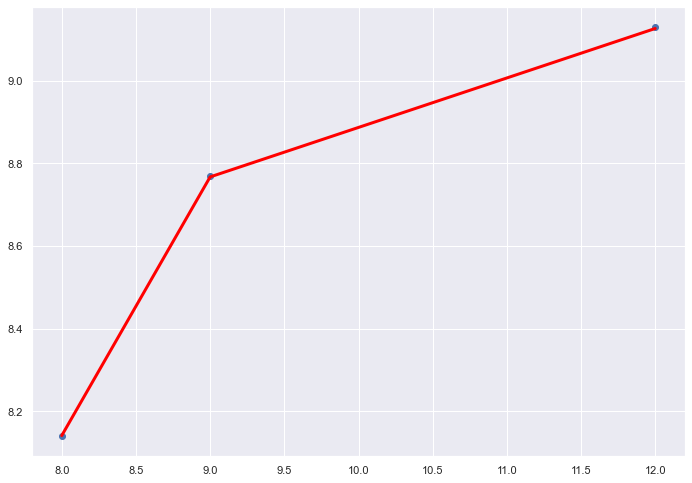

,Grupo,exp_var,Precisión,r2,MAE,MSE,MSLE,MedAE
0,4.0,0.999982,1.0,1.0,0.002186,0.000006,5.978469e-08,0.002705


In [82]:
# Se extraen los datos del grupo 2
dfa = df[(df['grupo'] == 'Grupo_2')]
X_p = dfa[['x']]
y_p = dfa['y']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)

from sklearn.preprocessing import PolynomialFeatures

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train_p)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()


# se genera el dataframe con las métricas
df_metrics = pd.DataFrame(columns=[
    'Grupo',
    'exp_var',
    'Precisión',
    'r2',
    'MAE',
    'MSE',
    'MSLE',
    'MedAE'
])

# Se calculan las métricas, no fue posible utilizar el comand from metrics_regression import * mostrado por el profesor.
# Por tanto, se ingresan a mano las métricas.
exp_var = explained_variance_score(y_test_p,Y_pred_pr)
Prc = pr.score(X_train_poli, y_train_p)
r2 = round(r2_score(y_test_p,Y_pred_pr),4)
MAE = mean_absolute_error(y_test_p,Y_pred_pr)
MSE = mean_squared_error(y_test_p,Y_pred_pr)
MSLE = mean_squared_log_error(y_test_p,Y_pred_pr)
MedAE = median_absolute_error(y_test_p,Y_pred_pr)
# se genera el dataframe con las métricas
df_metrics = df_metrics.append({
    'Grupo':i,
    'exp_var':exp_var,
    'Precisión':Prc,
    'r2': r2,
    'MAE':MAE,
    'MSE':MSE,
    'MSLE':MSLE,
    'MedAE':MedAE
}, ignore_index=True)
df_metrics

- Realizando el ajuste polinomico al grupo 2 se observa que la correlación llega a un valor de 1, es decir, se obtiene una correlación perfecta. Se concluye que los datos tenía una distribución cuadrática.

### Grupo 4

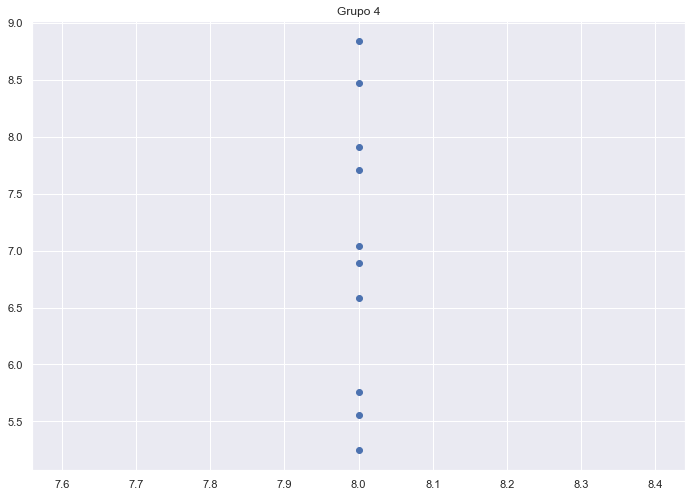

In [83]:
dfa = df[(df['grupo'] == 'Grupo_4')] # Se obtienen los datos del grupo 4
dfan = dfa.drop([40],axis=0) # Se elimina el outlier

X = dfan[['x']] # Se obtienen los valores en x para el grupo 4
Y = dfan['y'] # Se obtienen los valores en y para el grupo 4

plt.plot(X, Y, 'o') # Se grafica
plt.title("Grupo 4")
plt.show()

- Observando el gráfico elimando el outliers apreciamos que los valores se distribuyen en la vertical. No será posible obtener una correlación con los datos de esta forma.
- Vamos a analizar la correlación si intercambiamos los ejes, es decir, en la vertical y no en la horizontal como hasta ahora.

In [74]:
# Intercambiamos ejes para realizar el análisis
Y = dfan['x']
X = dfan[['y']]

frames_metrics = [] # Se generan listas vacías.
frames_coef = []

for model,name_models in list_models: # Se prueban todos los modeles definidos previamente.
    fit_model =  SklearnRegressionModels( model,name_models) # aplicamos el modelo elegido a la clase definida previamente
    frames_metrics.append(fit_model.metrics(X,Y,0.2)) # Se obtienen las métricas para cada modelo y se agregar a la lista vacía
    if name_models in ['lineal','ridge','lasso']:
        frames_coef.append(fit_model.parameters(X,Y,0.2))

    # juntar resultados: metricas
    aux = pd.concat(frames_metrics)
print('Metricas para el Grupos 4')
print(aux)

Metricas para el Grupos 4
   MAE  MSE  MSLE  MedAE  exp_var          model   r2
0  0.0  0.0   0.0    0.0      1.0         lineal  1.0
0  0.0  0.0   0.0    0.0      1.0          ridge  1.0
0  0.0  0.0   0.0    0.0      1.0          lasso  1.0
0  0.0  0.0   0.0    0.0      1.0            knn  1.0
0  0.0  0.0   0.0    0.0      1.0       bayesian  1.0
0  0.0  0.0   0.0    0.0      1.0  decision_tree  1.0
0  0.0  0.0   0.0    0.0      1.0            svm  1.0


C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


- Tal como esperabamos, la correlación en todos los modelos de regresión lineal definidos tenemos una correlación de 1 y errores de 0, es decir, es perfectamente lineal en la vertical.